In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [12]:
# data load and cleaning
DF_data = pd.read_csv("data/CPI_seperated.csv", index_col='products')
DF_data.rename(index={'Food 5':'Food','Shelter 6':'Shelter',
                      'Alcoholic beverages, tobacco products and recreational cannabis':'Alcohol, tobacco, recreational cannabis',
#                       'All-items excluding food and energy 7':'All-items excluding food and energy',
#                       'All-items excluding energy 7':'All-items excluding energy',
                     'Energy 7':'Energy',
                     'Goods 8':'Goods',
                     'Services 9':'Services'},inplace=True)
DF_data.drop(index=['All-items excluding food and energy 7','All-items excluding energy 7'],inplace=True)
DF_data

,2015,2016,2017,2018,2019,2020,2021,2022
products,,,,,,,,
Food,140.5,142.6,142.7,145.3,150.2,153.7,157.5,171.5
Shelter,133.7,135.8,138.1,140.9,144.5,147.0,152.7,163.3
"Household operations, furnishings and equipment",119.7,121.7,121.9,123.2,123.6,123.8,125.2,130.9
Clothing and footwear,94.6,94.4,93.7,94.5,96.1,94.4,94.1,95.4
Transportation,126.5,127.9,132.9,139.1,141.5,141.2,151.4,167.5
Gasoline,153.4,144.2,161.2,181.5,170.5,146.7,192.4,247.2
Health and personal care,120.5,122.2,124.3,125.9,127.4,129.2,132.6,138.0
"Recreation, education and reading",109.4,111.3,114.0,115.3,116.8,115.7,117.9,123.5
"Alcohol, tobacco, recreational cannabis",152.0,156.8,161.1,167.9,171.1,171.9,175.0,181.3


In [13]:
# calculatig the inflation rate for every category by getting the cpi for every category and using the iflation rate formula to 
# get the each inflation rate for every product for each year
years = [i for i in DF_data]
products = [i for i in DF_data.index]
products_CPI_list = []
for x in range(len(products)):
    category = products[x]
    CPI_List = [DF_data.loc[f"{category}", f"{year}"] for year in years]
    products_CPI_list.append(CPI_List)

inflation_rate_for_products = []
for i in products_CPI_list:
    inflation_rates= [round(((i[x+1]-i[x])/i[x])*100, ndigits=2) for x in range(len(i)-1)]
    inflation_rate_for_products.append(inflation_rates)
inflation_rate_for_products

[[1.49, 0.07, 1.82, 3.37, 2.33, 2.47, 8.89],
 [1.57, 1.69, 2.03, 2.56, 1.73, 3.88, 6.94],
 [1.67, 0.16, 1.07, 0.32, 0.16, 1.13, 4.55],
 [-0.21, -0.74, 0.85, 1.69, -1.77, -0.32, 1.38],
 [1.11, 3.91, 4.67, 1.73, -0.21, 7.22, 10.63],
 [-6.0, 11.79, 12.59, -6.06, -13.96, 31.15, 28.48],
 [1.41, 1.72, 1.29, 1.19, 1.41, 2.63, 4.07],
 [1.74, 2.43, 1.14, 1.3, -0.94, 1.9, 4.75],
 [3.16, 2.74, 4.22, 1.91, 0.47, 1.8, 3.6],
 [-3.01, 5.31, 6.68, -2.21, -7.6, 18.89, 22.51],
 [0.94, 0.85, 1.85, 1.32, -0.16, 4.73, 8.65],
 [1.83, 2.23, 2.68, 2.33, 1.41, 2.31, 5.04],
 [1.42, 1.56, 2.3, 1.95, 0.74, 3.36, 6.78]]

In [14]:
type(products_CPI_list[0][0])
type(inflation_rate_for_products[0][0])
type(years)

list

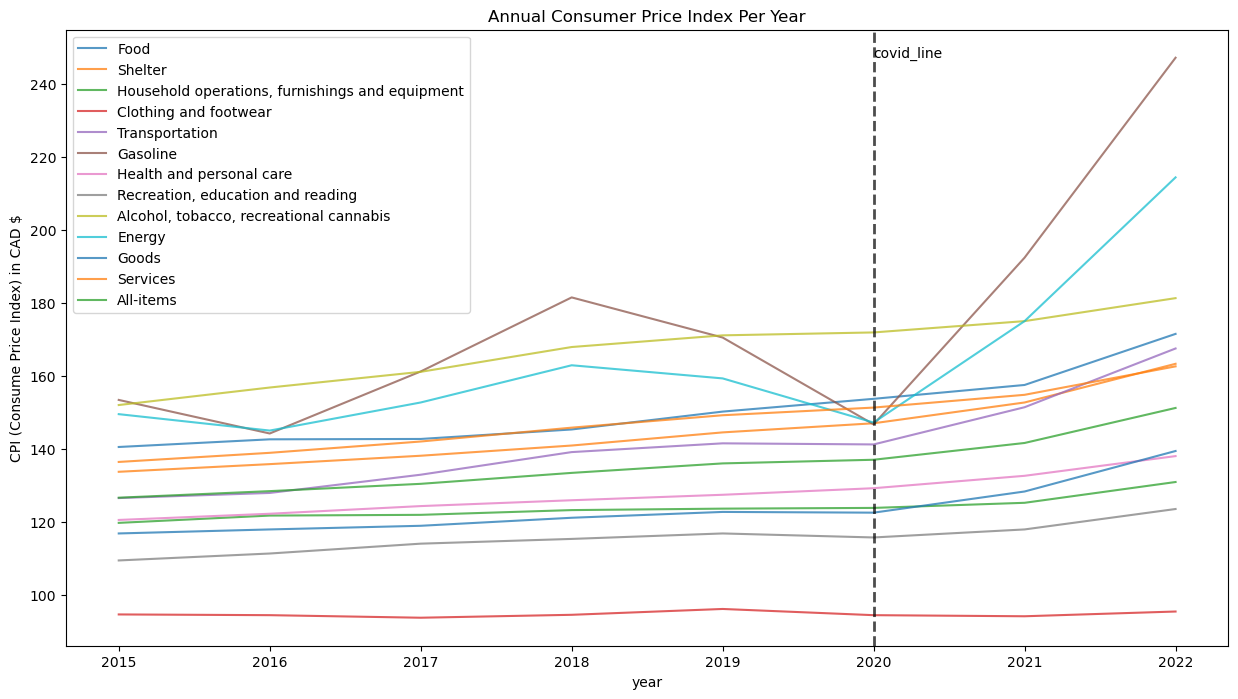

In [15]:
# plotting the CPI plot for each category
plt.figure(figsize=(15, 8))
for i in range(len(products)):
    plt.plot(years, products_CPI_list[i], alpha=0.75, mouseover=True)

plt.axvline(x ='2020', color='black',alpha=0.70, linestyle='--', linewidth=2, label='Covid_line')
covid_line_point=['2020', max(max(i) for i in products_CPI_list)]
plt.text(covid_line_point[0] ,covid_line_point[1],'covid_line')
plt.title("Annual Consumer Price Index Per Year")
plt.xlabel("year")
plt.ylabel("CPI (Consume Price Index) in CAD $")
plt.legend(labels=products, loc='best')
plt.savefig('data/cpi_per_year')
plt.show()


In [16]:
dup_years = [years[i+1] for i in range(len(years)-1)]
dup_years

['2016', '2017', '2018', '2019', '2020', '2021', '2022']

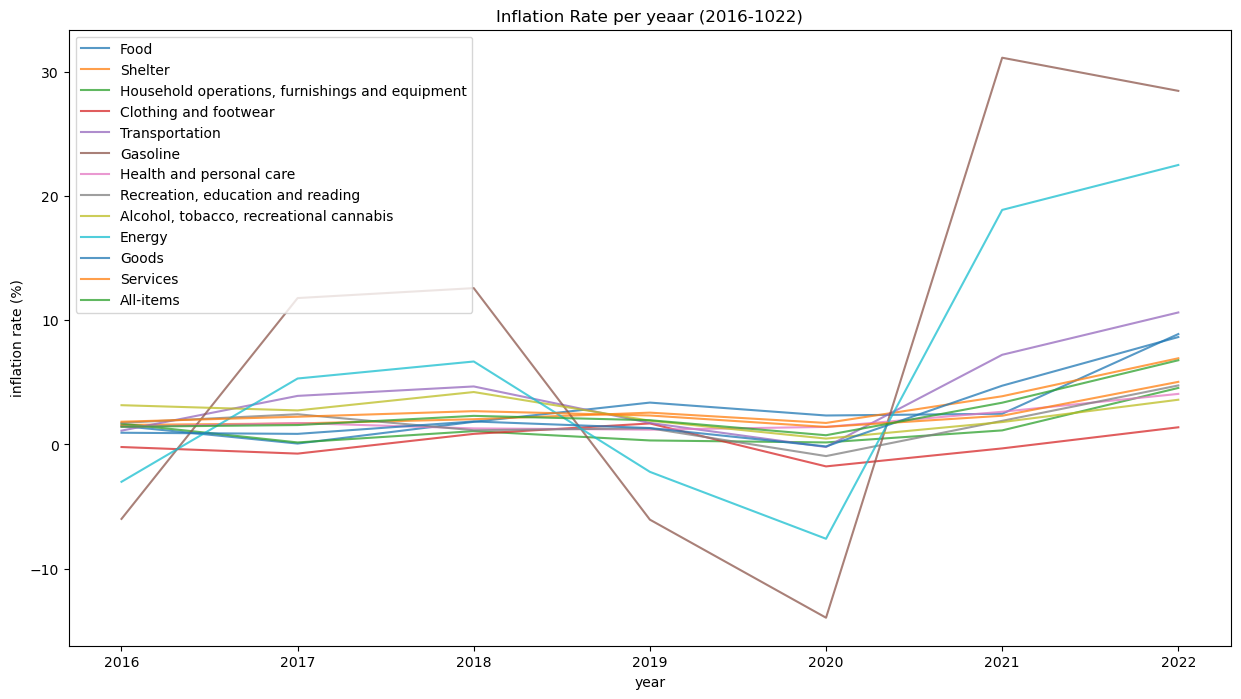

In [17]:
plt.figure(figsize=(15,8))
for i in range(len(inflation_rate_for_products)):
    plt.plot(dup_years, inflation_rate_for_products[i], alpha=.75)

    
plt.title("Inflation Rate per yeaar (2016-1022)")
plt.xlabel("year")
plt.ylabel("inflation rate (%)")
plt.legend(labels=products)
plt.savefig('data/Ave_inflation_per_year')
plt.show()

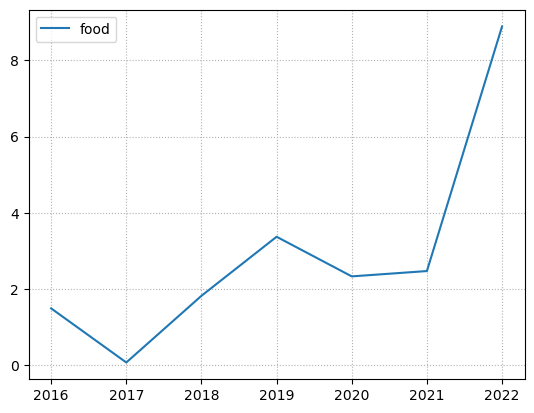

In [22]:
# if we put energy and gassolin out
plt.plot(dup_years, inflation_rate_for_products[0], label="food", fillstyle='full',
    gapcolor='red')
plt.grid(linestyle=':')
plt.legend()
plt.show()

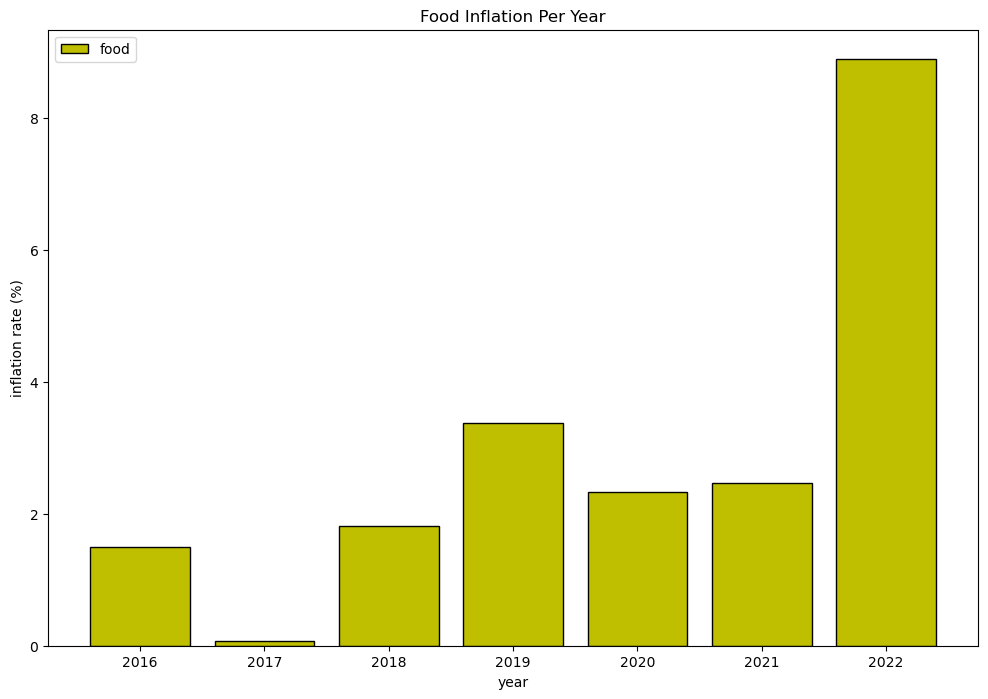

In [27]:
plt.figure(figsize=(12,8))
plt.bar(dup_years,inflation_rate_for_products[0],color='y',edgecolor='black', label='food')
# plt.bar_label(labels=inflation_rate_for_products[0])
plt.title("Food Inflation Per Year")
plt.xlabel("year")
plt.ylabel("inflation rate (%)")
plt.legend()
plt.savefig('data/cpi_per_year')
plt.show()